In [33]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [34]:
# carregamento de dados e metadados
datai = pd.read_csv('gds5473.csv',sep=',', index_col = 0)
meta = pd.read_csv('meta-gds5473.csv',sep=',', index_col = 0)

In [35]:
# verificaçao colunas e linhas de dados e metadados
print(datai.values.shape)
print(meta.values.shape)

(48107, 48)
(48, 4)


**Análise de dados e metadados**

Verifica-se que os dados são compostos por 48107 linhas e 48 colunas.
Por outro lado, os metadados são compostos por 48 linhas e 4 colunas.

Assim, terá de se proceder à criação da matriz de dados transposta.

In [36]:
data=datai.transpose()

**Descrição e caracterização do dataset**

O objetivo deste estudo era investigar os efeitos de um jejum curto na homeostase e na energia do músculo esquelético. Neste estudo foram colecionadas biopsias do músculo esquelético e análisadas emquatro situações diferentes: 1.5, 4, 10 e 24 horas após a refeição.

Assim, pretende-se relacionar o valor total de RNA obtido com o jejum.

Como se pode verificar, existem até 48107 genes que serão analisados e que, consequentemente, possam ter uma influencia para o estudo. No entanto (e como se verificará mais à frente), pode não se verificar o resgisto de determinados genes (valores nulos).

Quanto aos metadados, verifica-se que possuem 4 variaveis: a amostra, o indivíduo, a hora de recolha e a descrição

In [37]:
# valores em falta nos dados 
print("Valores em falta para cada atributo dos dados:")
print(data.isnull().sum())
print("")
print("Total de valores em falta nos dados:")
print(data.isnull().sum().sum())

Valores em falta para cada atributo dos dados:
ILMN_1343048    48
ILMN_1343049    48
ILMN_1343050    48
ILMN_1343052    48
ILMN_1343059    48
                ..
ILMN_3311170     0
ILMN_3311175     0
ILMN_3311180     0
ILMN_3311185     0
ILMN_3311190     0
Length: 48107, dtype: int64

Total de valores em falta nos dados:
37632


In [38]:
# valores em falta nos metadados 
print("Valores em falta para cada atributo dos metadados:")
print(meta.isnull().sum())
print("")
print("Total de valores em falta nos metadados:")
print(meta.isnull().sum().sum())

Valores em falta para cada atributo dos metadados:
sample         0
individual     0
time           0
description    0
dtype: int64

Total de valores em falta nos metadados:
0


In [39]:
# verificaçao do tipo de atributos nos dados
print("Tipos de atributos (dados):")
print(data.dtypes)

Tipos de atributos (dados):
ILMN_1343048    float64
ILMN_1343049    float64
ILMN_1343050    float64
ILMN_1343052    float64
ILMN_1343059    float64
                 ...   
ILMN_3311170    float64
ILMN_3311175    float64
ILMN_3311180    float64
ILMN_3311185    float64
ILMN_3311190    float64
Length: 48107, dtype: object


In [40]:
# verificaçao do tipo de atributos nos metadados
print("Tipos de atributos (metadados):")
print(meta.dtypes)

Tipos de atributos (metadados):
sample         object
individual     object
time           object
description    object
dtype: object


**Características dos dados e metadados**

Dados:
Os atributos dos dados são os diferentes tipos de gene (como por exemplo: ILMN_1343048, ILMN_1343049). Há 48107 atributos e são do tipo *float64*.

Metadados: 
Os atributos dos metadados são a amostra, o índividuo, o tempo após a refeição e a descrição. Estes atributos são do tipo *object*.

In [41]:
#pre-processamento dos dados
data.dropna(axis="columns", inplace=True)             #removem-se os valores nulos, dropna() remove as linhas que contêm valores nulos
data = preprocessing.scale(data)
print(data.shape)



(48, 47323)


**Passos do pré-processamento**

Primeiro, eliminaram-se os valores nulos com a função dropna(). Seguidamente, procedeu-se à normalização dos dados com o algoritmo preprocessing.scale().

Note-se que, após o pré-processamento dos dados, restam 47323 genes para análise.

**Escolha de variáveis de meta-dados**

Uma vez que os meta-dados possuem quatro variáveis ("sample", "individual", "time", "description"), apenas serão utilizadas duas: "individual" e "time". As variáveis "sample" e "description" não foram consideradas uma vez que não possuem informação relevante para a análise dos dados (como cluster, aprendizagem máquina, etc).

[6.00652010e-02 5.69230496e-02 3.82744447e-02 3.37939965e-02
 2.96700818e-02 2.91411319e-02 2.55861292e-02 2.49198978e-02
 2.34602566e-02 2.33634716e-02 2.28557326e-02 2.24160873e-02
 2.13367322e-02 2.12811765e-02 2.03312678e-02 2.02027770e-02
 2.00700632e-02 1.96958449e-02 1.92742287e-02 1.87673361e-02
 1.85293743e-02 1.83705203e-02 1.81618565e-02 1.80245655e-02
 1.78917138e-02 1.77861353e-02 1.76320580e-02 1.74164056e-02
 1.72243474e-02 1.71625092e-02 1.70850126e-02 1.68293419e-02
 1.67969827e-02 1.66771443e-02 1.64783409e-02 1.62990324e-02
 1.61840362e-02 1.60169198e-02 1.58985659e-02 1.58762825e-02
 1.57440996e-02 1.55792569e-02 1.54429585e-02 1.52827806e-02
 1.49580782e-02 1.48114916e-02 1.44112826e-02 4.29184306e-33]
0.9095141516999559


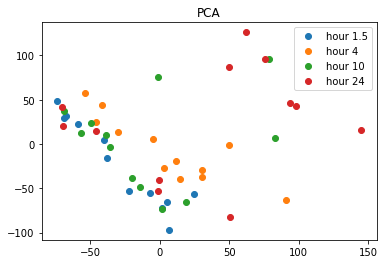

In [42]:
n=48                                                                # existem 48 amostras para proceder à análise
pca = PCA(n_components=n)
pca.fit(data)                                                           # media e desvio
x_reduced = pca.transform(data)                                         # escala
print (pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_[:41]))                          # 90% da variabilidade

index_samples=[]
for hora in meta.time.unique():
    l=[]
    for i in range(0,48):
        if meta.time[i]==hora:
            l.append(i)
    index_samples.append(l)                               #criaçao de lista de index de 0 a 48, agrupados em listas correspondentes as diferentes horas

i=0

for hora in meta.time.unique():
    for i in range(0,len(index_samples)):
        if meta.time[i]==hora:
            plt.plot(x_reduced[index_samples[i],0],x_reduced[index_samples[i],1], 'o' , label=hora)
    i=i+1

plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()
